In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score ,roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#let's check column variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


observation: there are many string objevt available.
no nullEntris.
let's covert object data type into numerical one and perform EDA

In [4]:
df.isna().sum()#no null entries in columns

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
#coverting string data into numeric form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])#income<=$50k:0,income>=$50k:1

In [7]:
df.describe()
#there seems to be outliers in capital_gain and capital_loss features.

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


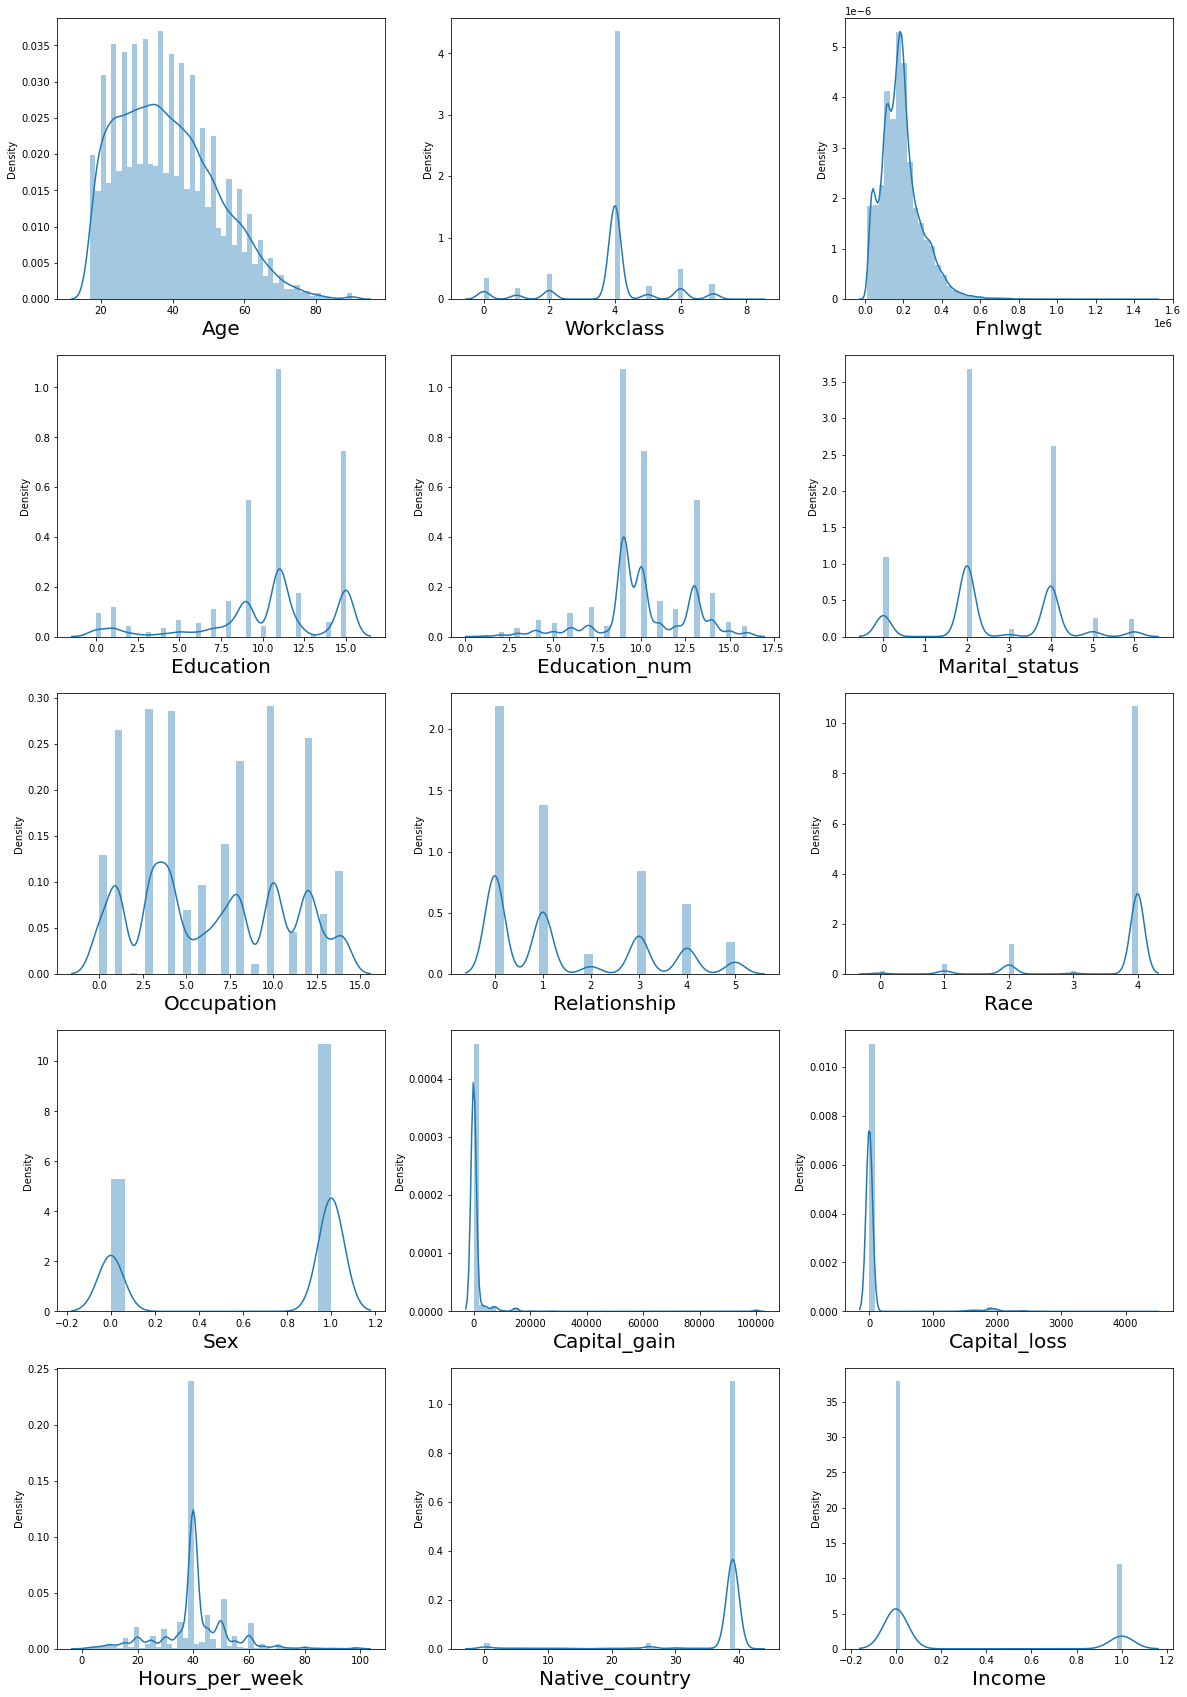

In [11]:
#let's visualize it
plt.figure(figsize=(20,30),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

In [ ]:
#Hours_per_week, capital_gain,capital_loss,fnlweight,age have outliers and skewness.
#other's have categorical values.

#### Check for multicollinearity

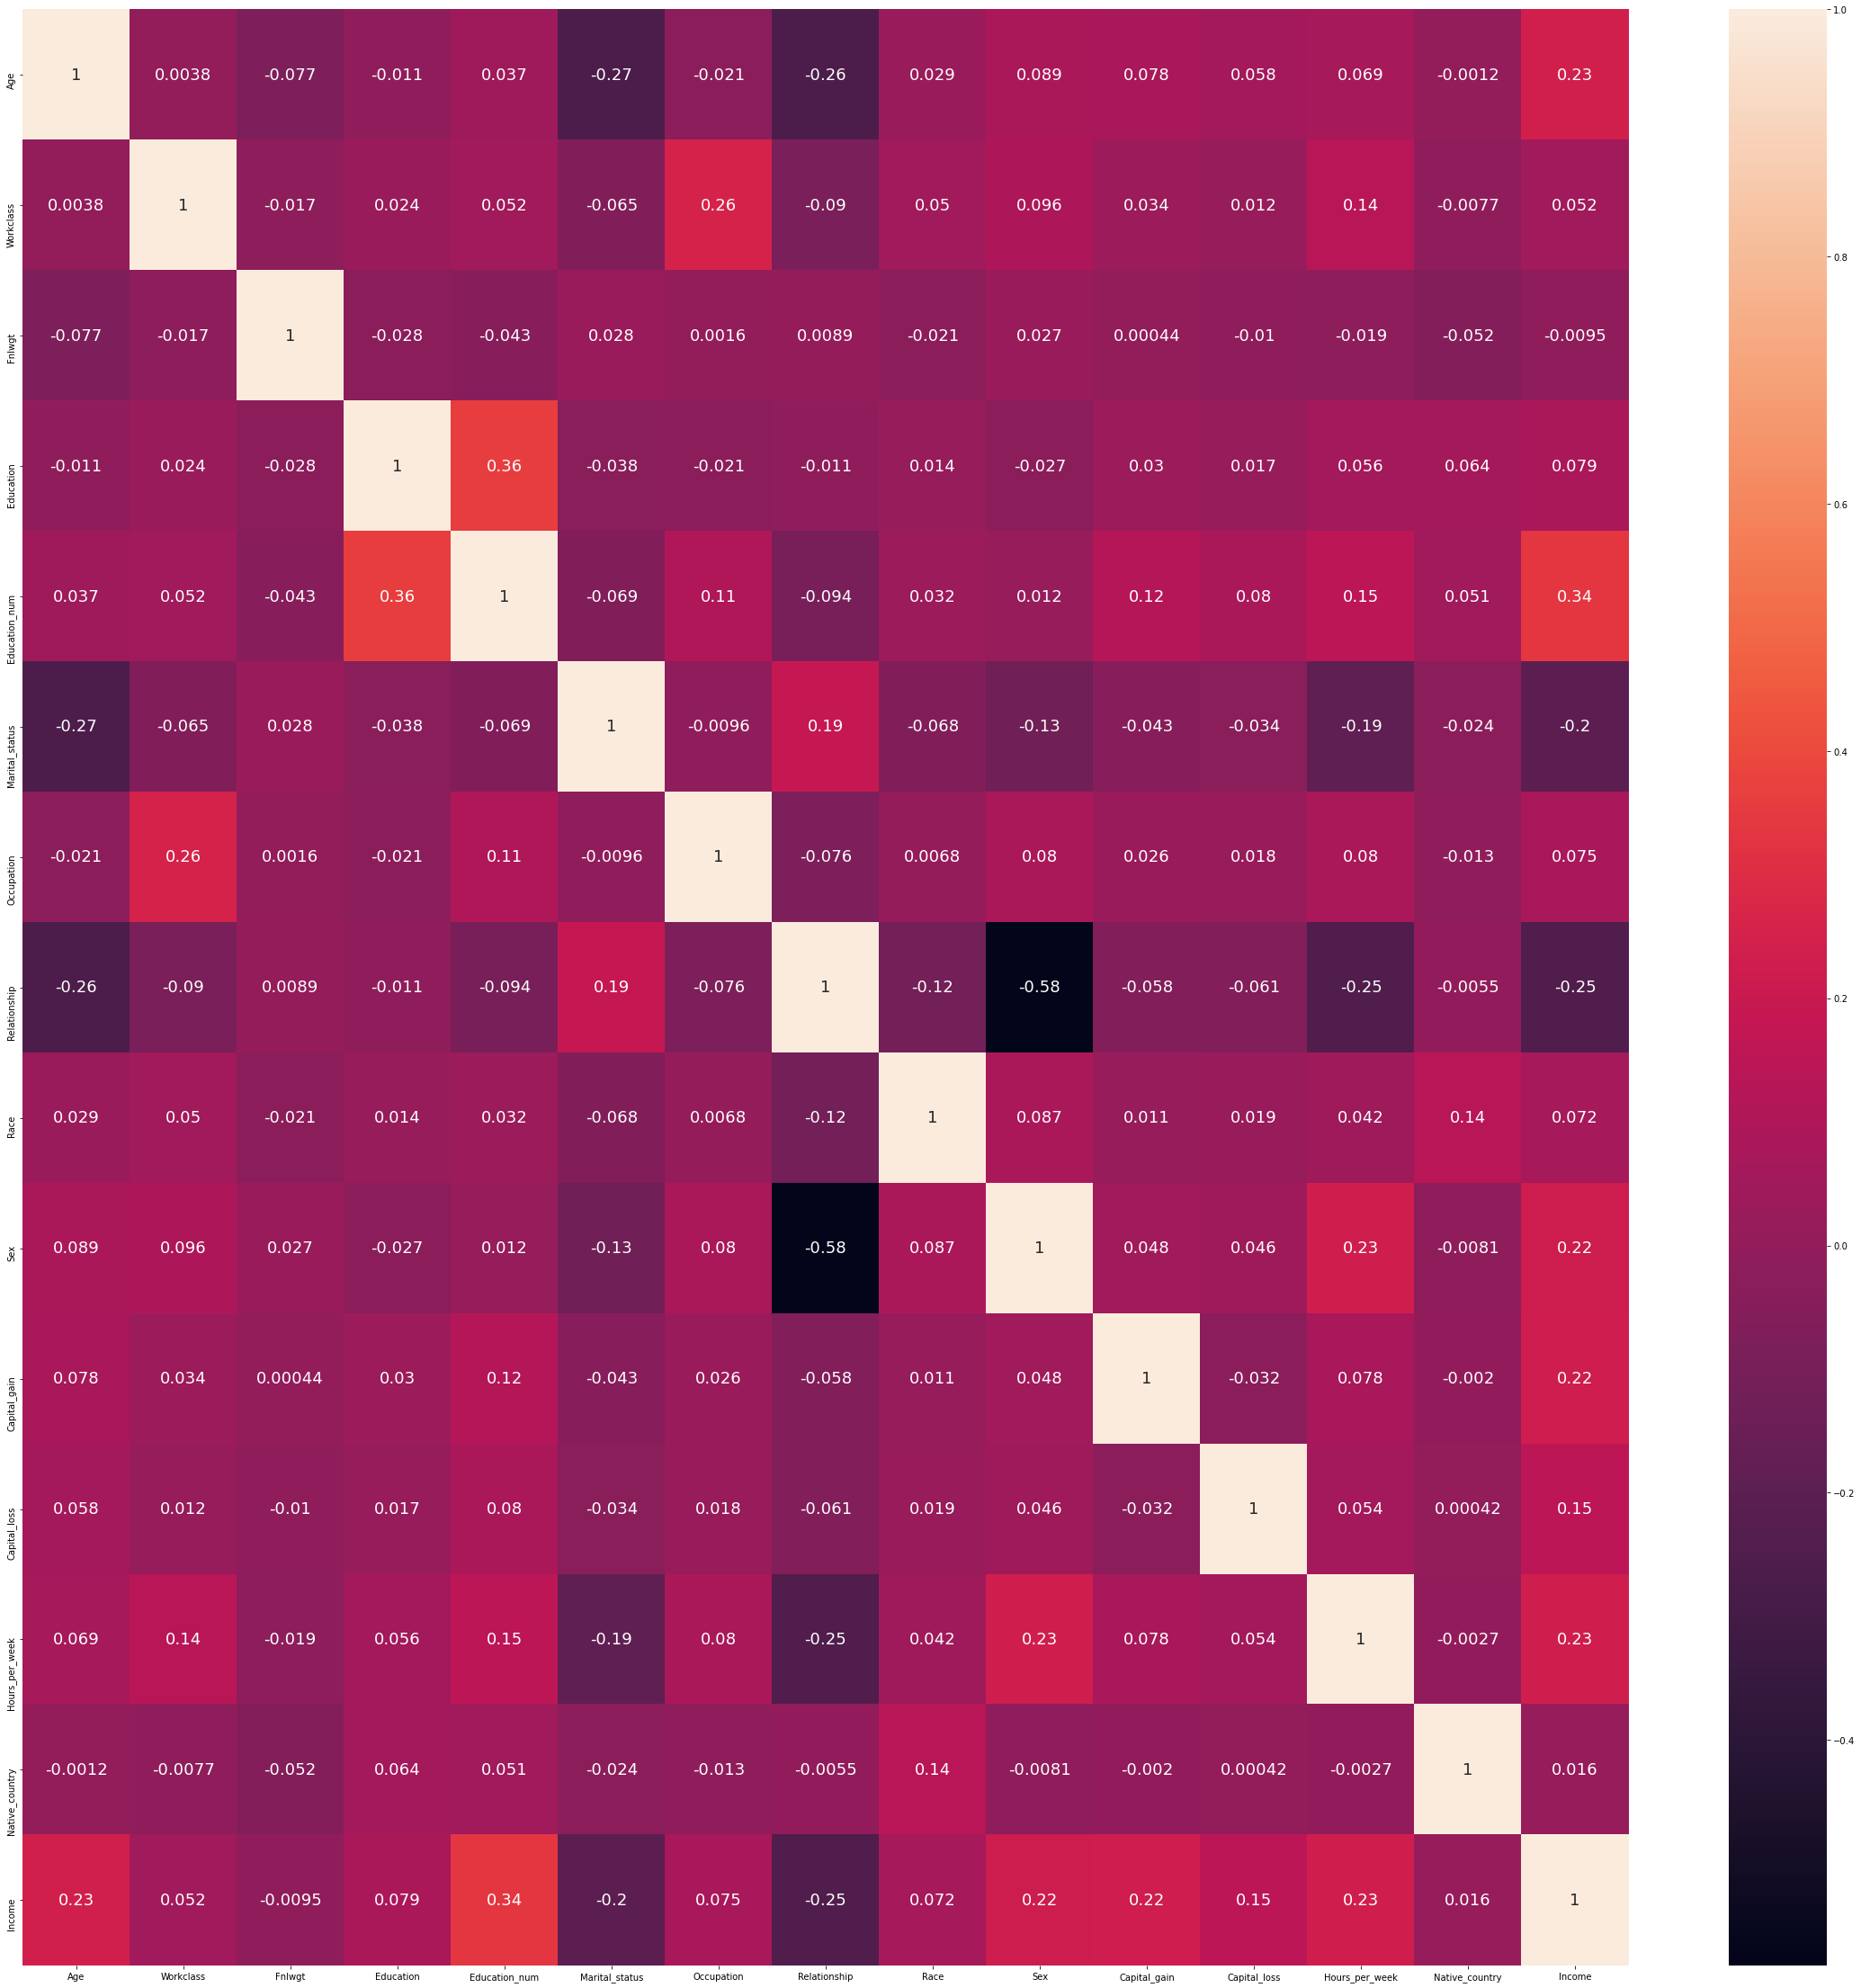

In [12]:
corr=df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(data=corr,annot=True,annot_kws={'size':18})
plt.show()

There is no multicollinearity among features,
let's check variable impact over target column

In [13]:
#checking correlation of features and target using corrwith
df.drop('Income',axis=1).corrwith(df.Income)

Age               0.234039
Workclass         0.051645
Fnlwgt           -0.009481
Education         0.079311
Education_num     0.335182
Marital_status   -0.199295
Occupation        0.075448
Relationship     -0.250924
Race              0.071853
Sex               0.215995
Capital_gain      0.223333
Capital_loss      0.150523
Hours_per_week    0.229690
Native_country    0.015845
dtype: float64

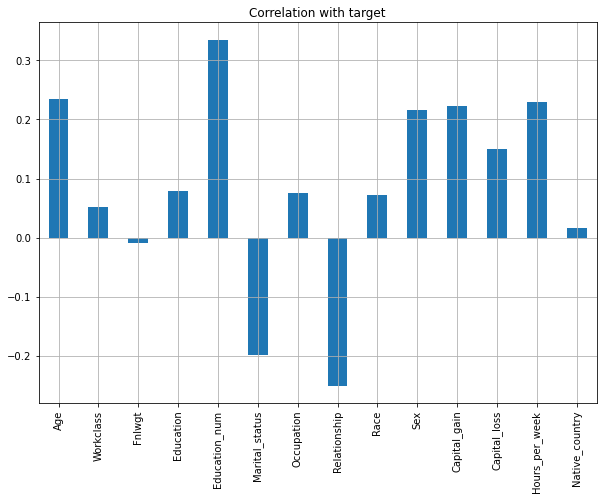

In [14]:
#visualising the correlation 
df.drop('Income',axis=1).corrwith(df.Income).plot(kind='bar',figsize=(10,7),title='Correlation with target',grid=True)
plt.show()

#### Since,fnlweight has outliers and has minimum impact over our target column, let's drop it.

### Now, let's select 99.7% data, leaving outliers.

In [17]:
df1=df.drop('Fnlwgt',axis=1)
from scipy.stats import zscore #taking into consideration 99.7% data
z = np.abs(zscore(df1))
df_new = df1[(z<3).all(axis = 1)]
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,11,9,4,1,3,4,1,0,0,20,39,0


### Checking for skewness

In [19]:
X=df_new.drop('Income',axis=1)
y=df_new.Income
X.skew()

Age                0.486460
Workclass         -0.738585
Education         -0.956884
Education_num     -0.145874
Marital_status    -0.045972
Occupation         0.132880
Relationship       0.748903
Race              -2.557087
Sex               -0.684763
Capital_gain       4.931796
Capital_loss      29.488410
Hours_per_week    -0.358951
Native_country    -5.398676
dtype: float64

In [ ]:
#considering threshold of +-0.5
#Capital_gain,Capital_loss have skewness, remaining all have categorical values.

In [20]:
#Removing skewness using yeo-johnson method



from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')


In [21]:
#Let's Normalise data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

### checking target column is balanced or not

In [22]:
df.Income.value_counts()#checking target column is balanced or not
#income<=$50k:0,income>=$50k:1
#dataset is imbalaced  let's use undersampling

0    24719
1     7841
Name: Income, dtype: int64

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=343)

In [25]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ds=NearMiss(.75)

X_trainus,y_trainus=ds.fit_resample(X_train,y_train)
print('Previous points',Counter(y_train))
print('New points',Counter(y_trainus))

Previous points Counter({0: 15058, 1: 4346})
New points Counter({0: 5794, 1: 4346})


### Logistic_regression_with_undersampled_data

In [36]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_trainus,y_trainus)
y_pred=log.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.7968017313935313

In [37]:
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))

[[5629  827]
 [ 863  998]] 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6456
           1       0.55      0.54      0.54      1861

    accuracy                           0.80      8317
   macro avg       0.71      0.70      0.71      8317
weighted avg       0.80      0.80      0.80      8317



### Logistic_reg_without_Undersampled_data

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=log_reg.predict(X_train)
print('Training score:',log_reg.score(X_train,y_train))
print('Testing score:',log_reg.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(log_reg,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8319105446675484
[[6097  359]
 [1039  822]] 

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      6456
           1       0.70      0.44      0.54      1861

    accuracy                           0.83      8317
   macro avg       0.78      0.69      0.72      8317
weighted avg       0.82      0.83      0.82      8317

Training score: 0.8281282209853639
Testing score: 0.8319105446675484
Cross_validation_score: 0.8290827702504888


In [ ]:
#Model is performing better without sampling the data.

### Random_forest_classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train,y_train)
train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=rf.predict(X_train)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8448959961524588
[[5937  519]
 [ 771 1090]] 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6456
           1       0.68      0.59      0.63      1861

    accuracy                           0.84      8317
   macro avg       0.78      0.75      0.77      8317
weighted avg       0.84      0.84      0.84      8317

Training score: 0.9776850133992991
Testing score: 0.8448959961524588
Cross_validation_score: 0.8443418924528032


### SVC Classifier

In [31]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)
train_pred=svc.predict(X_train)
print("svc_training_score:",svc.score(X_train,y_train))
print("svc_testing_score:",svc.score(X_test,y_test))
pred_svc = svc.predict(X_test)
print("accuracy_score :",accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

svc_training_score: 0.843176664605236
svc_testing_score: 0.8392449200432849
accuracy_score : 0.8392449200432849
[[6097  359]
 [ 978  883]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6456
           1       0.71      0.47      0.57      1861

    accuracy                           0.84      8317
   macro avg       0.79      0.71      0.74      8317
weighted avg       0.83      0.84      0.83      8317

Cross_validation_score: 0.8387505611310841


### Ada boost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada.predict(X_train)
print('Training score:',ada.score(X_train,y_train))
print('Testing score:',ada.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8612480461704942
[[6122  334]
 [ 820 1041]] 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6456
           1       0.76      0.56      0.64      1861

    accuracy                           0.86      8317
   macro avg       0.82      0.75      0.78      8317
weighted avg       0.85      0.86      0.85      8317

Training score: 0.8596681096681097
Testing score: 0.8612480461704942
Cross_validation_score: 0.8591322278563036


### XGBoost Classifier

In [35]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=xgb.predict(X_train)
print('Training score:',xgb.score(X_train,y_train))
print('Testing score:',xgb.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

[12:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8678610075748467
[[6040  416]
 [ 683 1178]] 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6456
           1       0.74      0.63      0.68      1861

    accuracy                           0.87      8317
   macro avg       0.82      0.78      0.80      8317
weighted avg       0.86      0.87      0.86      8317

Training score: 0.8987837559266131
Testing score: 0.8678610075748467
[12:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

### Roc_Auc curve

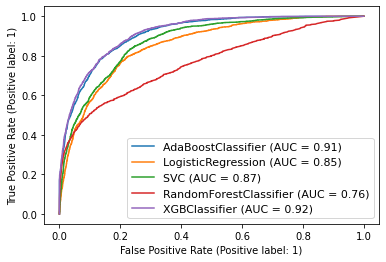

In [38]:
disp=plot_roc_curve(ada,X_test,y_test)
plot_roc_curve(log_reg,X_test,y_test,ax=disp.ax_) #ax_=Axes with confusion matrix of adaboost
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### XGBoost algo is giving the best test results, let's tune hyperparameter

In [39]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [44]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]}


In [46]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=5, scoring='roc_auc')
gs2.fit(X_train, y_train)

[14:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

In [48]:
gs2.best_estimator_

XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
xgb=XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
xgb.fit(X_train,y_train)

[19:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
y_pred=xgb.predict(X_test)

In [54]:
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))

0.8743537333173019
[[6122  334]
 [ 711 1150]] 

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6456
           1       0.77      0.62      0.69      1861

    accuracy                           0.87      8317
   macro avg       0.84      0.78      0.80      8317
weighted avg       0.87      0.87      0.87      8317



### XGboost is giving 87 percent accuracy

In [ ]:
#saving the model in local system
import pickle
filename='finalized_HR_attrition.pickle'
pickle.dump(ada,open(filename,'wb'))